# ***AEROFIT CASE STUDY***

**COLAB LINK**:


https://colab.research.google.com/drive/14r_jmlfVprJAgXi20ljuFABG8xGZpwC0?usp=sharing

**DEFINING PROBLEM STATEMENT**

 **ABOUT AEROFIT:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**BUSINESS PROBLEM:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



### About data:
* Product Purchased : KP281, KP481, or KP781
* Age : In years
* Gender : Male/Female
* Education : In years
* MaritalStatus : Single or partnered
* Usage : The average number of times the customer plans to use the treadmill each week.
* Income : Annual income (in USD)
* Fitness : Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles : The average number of miles the customer expects to walk/run each week

# **DEFINING BASIC MATRIX**


In [1]:
# importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the AEROFIT dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Outlier detection and treatment

In [3]:
mean = df['Miles'].mean()
mean

103.19444444444444

In [4]:
std_dev = df['Miles'].std()
std_dev

51.86360466180931

<Axes: xlabel='Miles', ylabel='Count'>

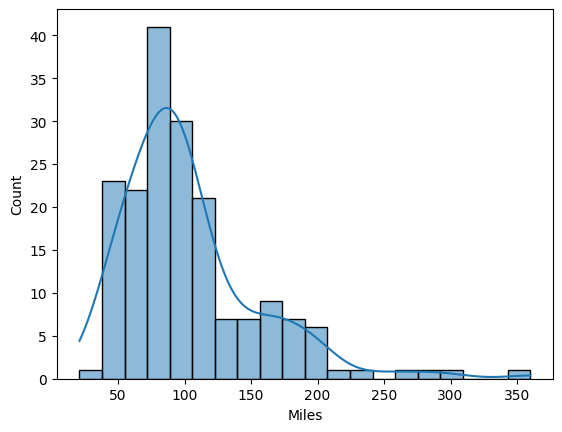

In [5]:
sns.histplot(df['Miles'],kde=True)

In [6]:
mean-3*std_dev

-52.396369540983486

In [7]:
mean+3*std_dev

258.7852584298724

In [8]:
no_outliers = df[(df['Miles']>(-52.39)) & (df['Miles']<(278.78))]
no_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [9]:
# It shows the count of the no.of row and columns present in dataframe
df.shape

(180, 9)

In [10]:
#Total number of elemnts this dataframe contains
df.size

1620

In [11]:
# Dimension pf the datsframe
df.ndim

2

In [12]:
# Top 5 rows of the dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [13]:
# Last 5 rows of the dataframe
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [14]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
# Columns data type
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [16]:
# All the columns present in the dataframe
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [17]:
# It shows how much space used by each of the columns
df.memory_usage()

Index             128
Product          1440
Age              1440
Gender           1440
Education        1440
MaritalStatus    1440
Usage            1440
Fitness          1440
Income           1440
Miles            1440
dtype: int64

In [18]:
# Its gave the information about the basic statistics of variables or the descriptive statistics of the data(also known to be 5 number summary)
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Value counts and unique attributes

In [19]:
# Show us the value count of all PRODUCTS.
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [20]:
# Show us the value count of all GENDER.
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [21]:
# Show us the value count of all THE MARITALSTATUS.
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [22]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [23]:
#Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [24]:
# Top 10 value counts for the Incomes
df['Income'].value_counts()[:10]

Income
45480    14
52302     9
46617     8
54576     8
53439     8
50028     7
51165     7
40932     6
48891     5
32973     5
Name: count, dtype: int64

In [25]:
# Show us the value count of all the Miles coouvered by customers.
df['Miles'].value_counts()[:10]

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
Name: count, dtype: int64

In [26]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [27]:
(pd.crosstab(df['Product'], df['Gender'],normalize = True)*100).round(2)

Gender,Female,Male
Product,,
KP281,22.22,22.22
KP481,16.11,17.22
KP781,3.89,18.33


#MISSING VALUE(HANDLING)

In [28]:
# There is no missing values available in the dataset
df.isna().sum().sum()

0

In [29]:
# Unique number of elements
df.nunique().sum()

157

In [30]:
# Unique elements present in every columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [31]:
# Unique product in the dataset
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

# OUTLIERS DETECTION

In [32]:
# By seeing the variation between 50 percentile and mean we can also detect the outliers
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [33]:
# Find mean and meadian fron df
describe = df.describe().loc[['mean','50%']]
describe

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000


In [34]:
# Difference between mean and meadian
difference = abs(describe.loc['mean'] - describe.loc['50%'])
difference = difference.reset_index()
difference.rename(columns = {'index':'Columns',0:'Difference'})

,Columns,Difference
0,Age,2.788889
1,Education,0.427778
2,Usage,0.455556
3,Fitness,0.311111
4,Income,3123.077778
5,Miles,9.194444


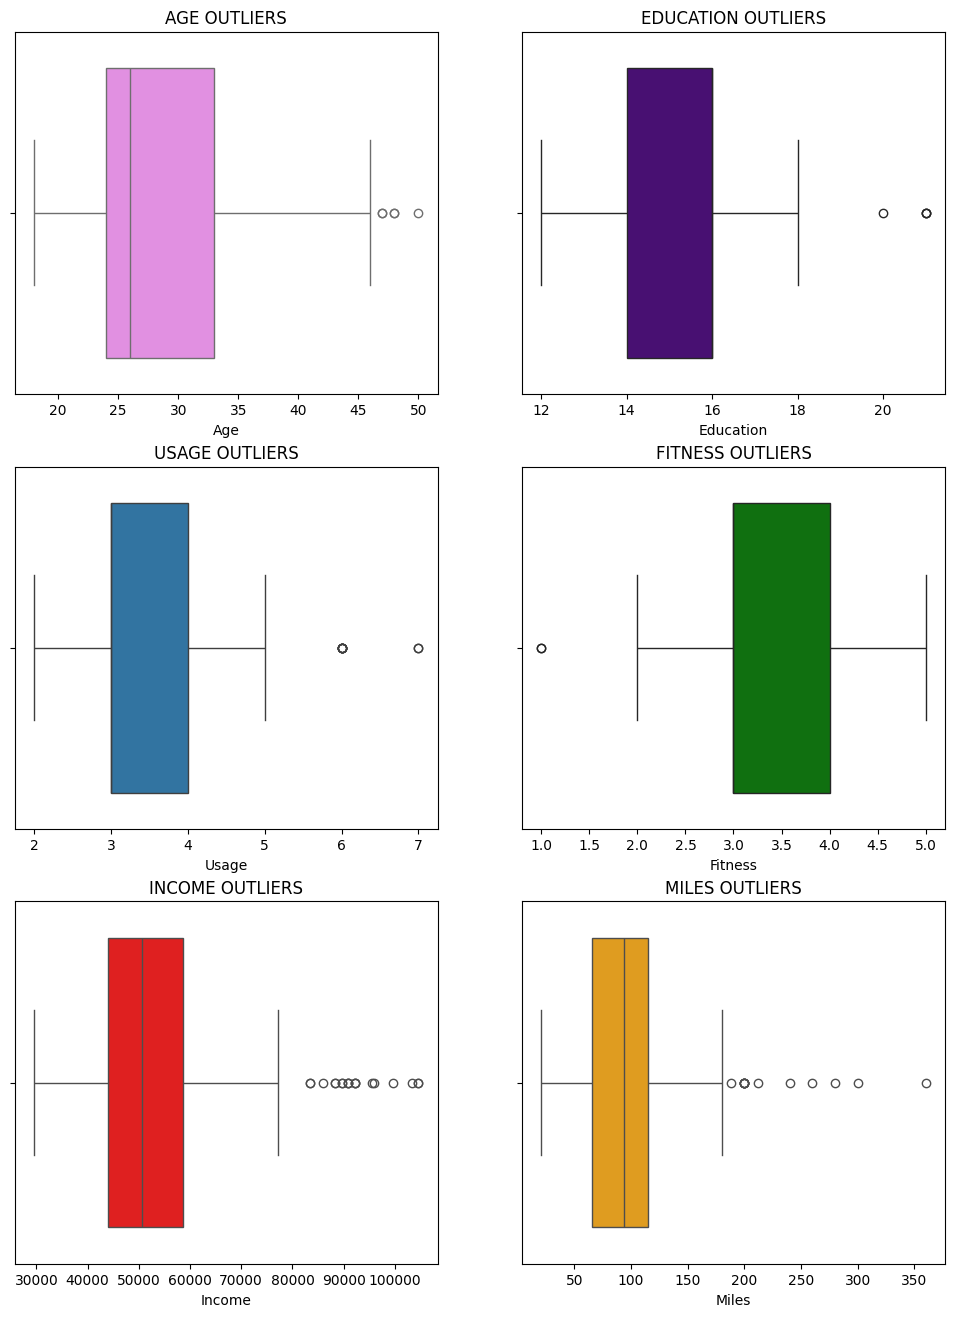

In [35]:
# Outliers detection using box plot:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

sns.boxplot(data=df, x='Age', ax=ax[0, 0], color ='violet').set_title('AGE OUTLIERS')
sns.boxplot(data=df, x='Education', ax=ax[0, 1], color ='indigo').set_title('EDUCATION OUTLIERS')
sns.boxplot(data=df, x='Usage', ax=ax[1, 0]).set_title('USAGE OUTLIERS')
sns.boxplot(data=df, x='Fitness', ax=ax[1, 1], color ='green').set_title('FITNESS OUTLIERS')
sns.boxplot(data=df, x='Income', ax=ax[2, 0], color ='red').set_title('INCOME OUTLIERS')
sns.boxplot(data=df, x='Miles', ax=ax[2, 1], color ='orange').set_title('MILES OUTLIERS')

plt.show()

# UNIVARIATE ANALYSIS

In [36]:
df[:2]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


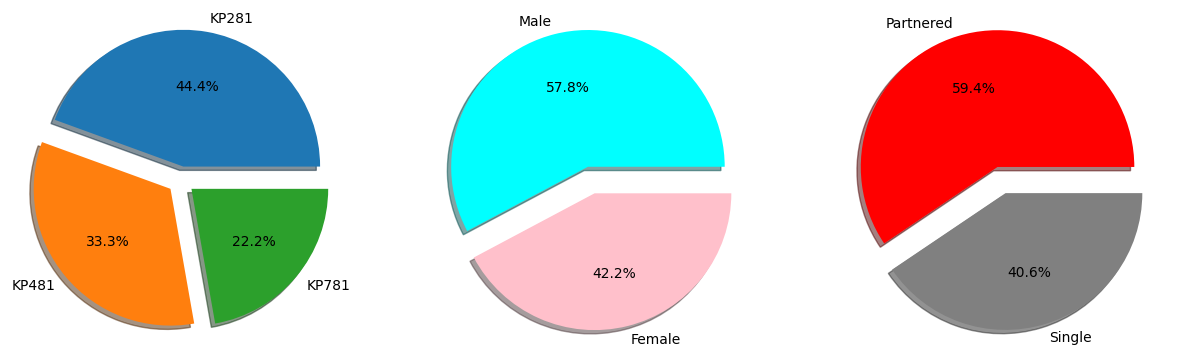

In [37]:
plt.figure(figsize = (15,20))

plt.subplot(1, 3,1)
plt.pie(df['Product'].value_counts(),autopct='%1.1f%%',explode=[0.1, 0.1,0.1],shadow = True,labels=df['Product'].value_counts().index)

plt.subplot(1, 3,2)
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',explode=[0.1,0.1],shadow = True,colors=['cyan','pink'],labels=df['Gender'].value_counts().index)

plt.subplot(1, 3,3)
plt.pie(df['MaritalStatus'].value_counts(),autopct='%1.1f%%',explode=[0.1,0.1],shadow = True,colors=['red','grey'] ,labels=df['MaritalStatus'].value_counts().index);


CONCLUSION:

* Most prefered procut is KP281
* less prefered product is kp781
* Male count is high than Female
* Most of the partnered customer are there in dataframe than the singles.

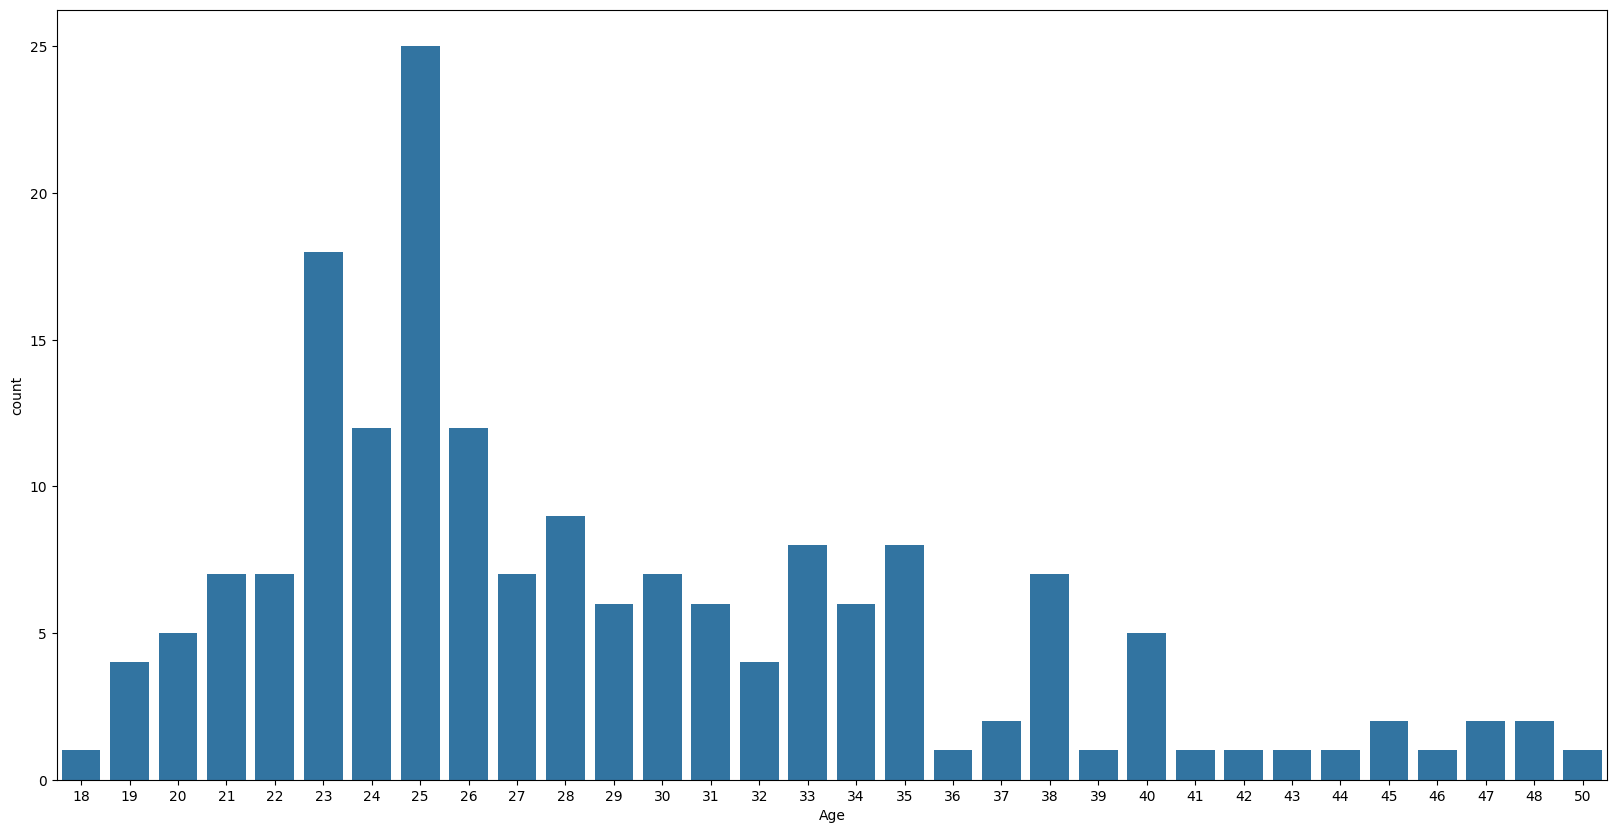

In [38]:
plt.figure(figsize = (20,10))
sns.countplot(data = df,x = 'Age')
plt.show()

CONCLUSION:

Most of customers are between Teenage and in their Mid 20s.

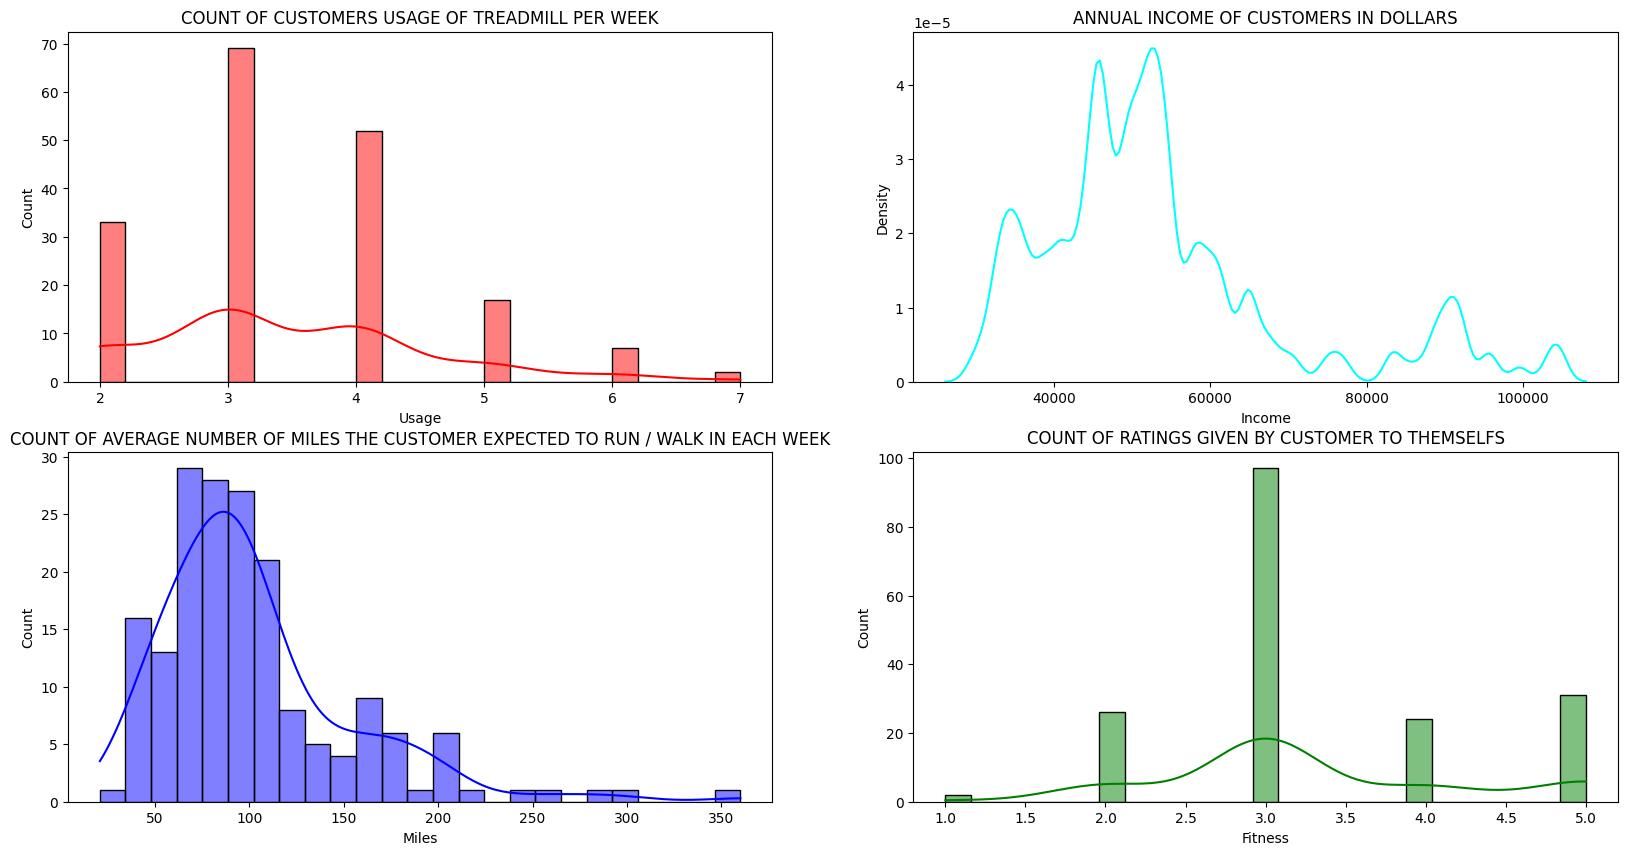

In [39]:
# COUNTPLOT
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.histplot(data = df,x='Usage',bins = 25,kde =True,color ='red').set_title('COUNT OF CUSTOMERS USAGE OF TREADMILL PER WEEK')

plt.subplot(2,2,2)
sns.kdeplot(data = df,x='Income',color ='cyan',bw_adjust=.2).set_title('ANNUAL INCOME OF CUSTOMERS IN DOLLARS')

plt.subplot(2,2,3)
sns.histplot(data = df,x='Miles',bins = 25,kde =True,color ='blue').set_title('COUNT OF AVERAGE NUMBER OF MILES THE CUSTOMER EXPECTED TO RUN / WALK IN EACH WEEK')

plt.subplot(2,2,4)
sns.histplot(data = df,x='Fitness',bins = 25,kde =True,color ='green').set_title('COUNT OF RATINGS GIVEN BY CUSTOMER TO THEMSELFS')

plt.show()

CONCLUSION:

* The highest rating given by customer is 3 and then 5.
* Most of the customers runs/walk around 60 to 100 miles per week.
* Customers high income range is 40000 to 55000 in dollars.
* THe average number of times customers plans to use tread mil in each week is 3.

# BIVARIATE ANALYSIS AND MULTIVARIATE ANALYSIS

Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

In [40]:
df[:2]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


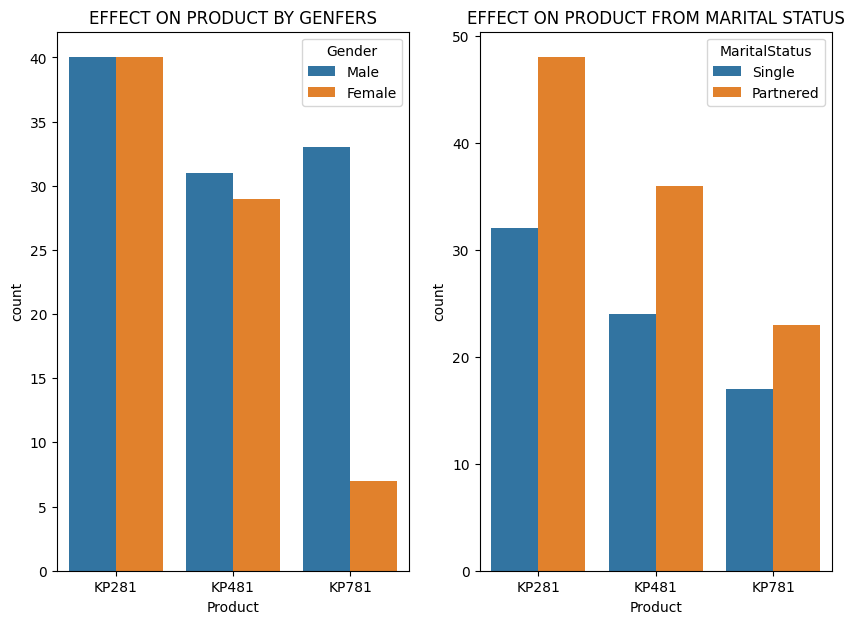

In [41]:
# Countplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

sns.countplot(data= df, x='Product',hue = 'Gender',ax = ax[0]).set_title('EFFECT ON PRODUCT BY GENFERS')
sns.countplot(data = df, x ='Product',hue= 'MaritalStatus',ax = ax[1]).set_title('EFFECT ON PRODUCT FROM MARITAL STATUS')
plt.show()

CONCLUSION:

* KP281 product prefer by male who are partnered.
and similarly for the other products also.
* the product which are less prefered by the female cutomers are KP781 and also who all are partnered.


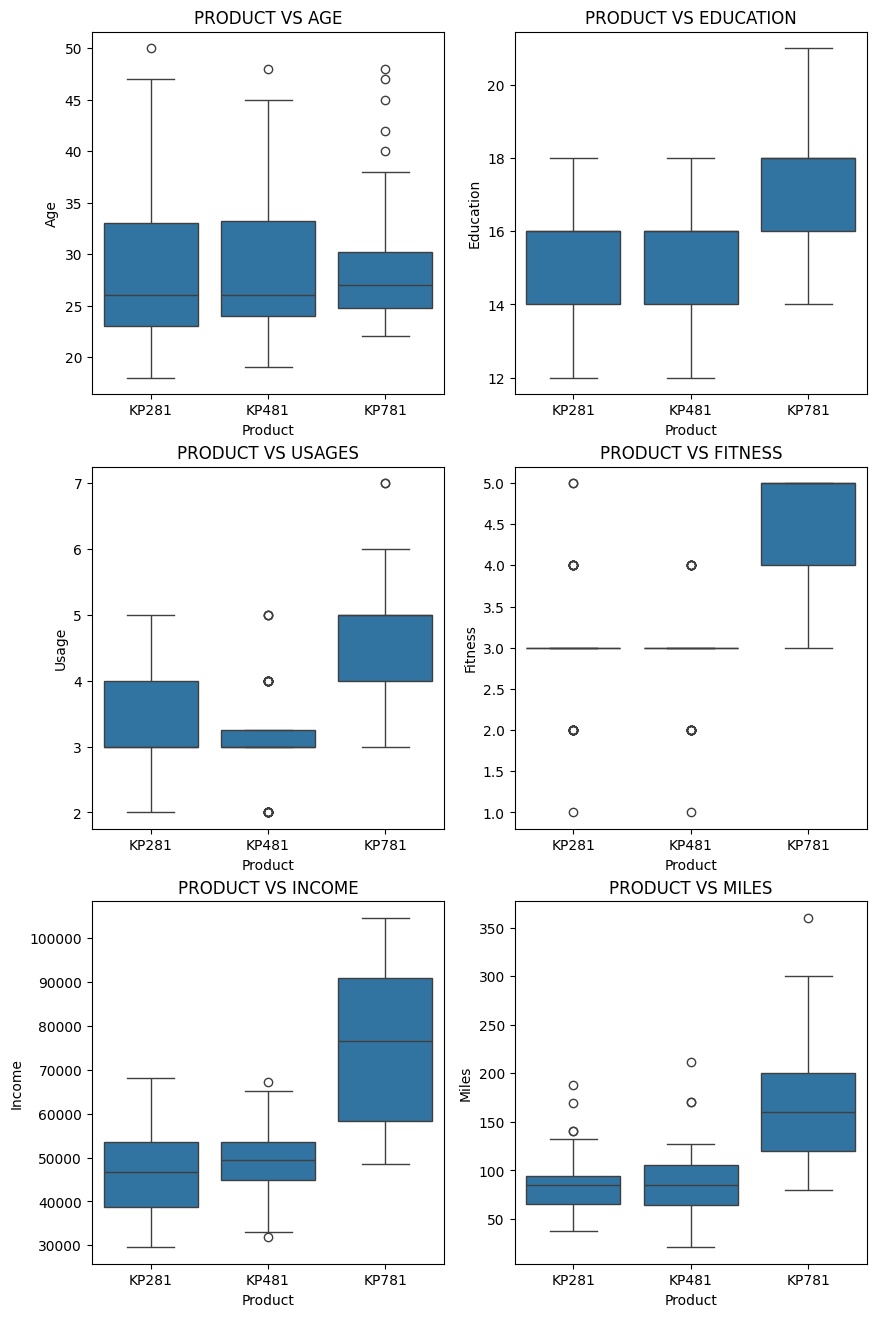

In [42]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))

sns.boxplot(data= df, x='Product', y='Age',ax = ax[0,0]).set_title('PRODUCT VS AGE')
sns.boxplot(data= df, x='Product', y='Education',ax = ax[0,1]).set_title('PRODUCT VS EDUCATION')
sns.boxplot(data= df, x='Product', y='Usage',ax =ax[1,0]).set_title('PRODUCT VS USAGES')
sns.boxplot(data= df, x='Product', y='Fitness',ax =ax[1,1]).set_title('PRODUCT VS FITNESS')
sns.boxplot(data= df, x='Product', y='Income',ax =ax[2,0]).set_title('PRODUCT VS INCOME')
sns.boxplot(data= df, x='Product', y='Miles',ax =ax[2,1]).set_title('PRODUCT VS MILES')

plt.show()

In [43]:
# Create seperate dataframe for the different proucts
kp281_df = df[df['Product'] == 'KP281']
kp481_df = df[df['Product'] == 'KP481']
kp781_df = df[df['Product'] == 'KP781']

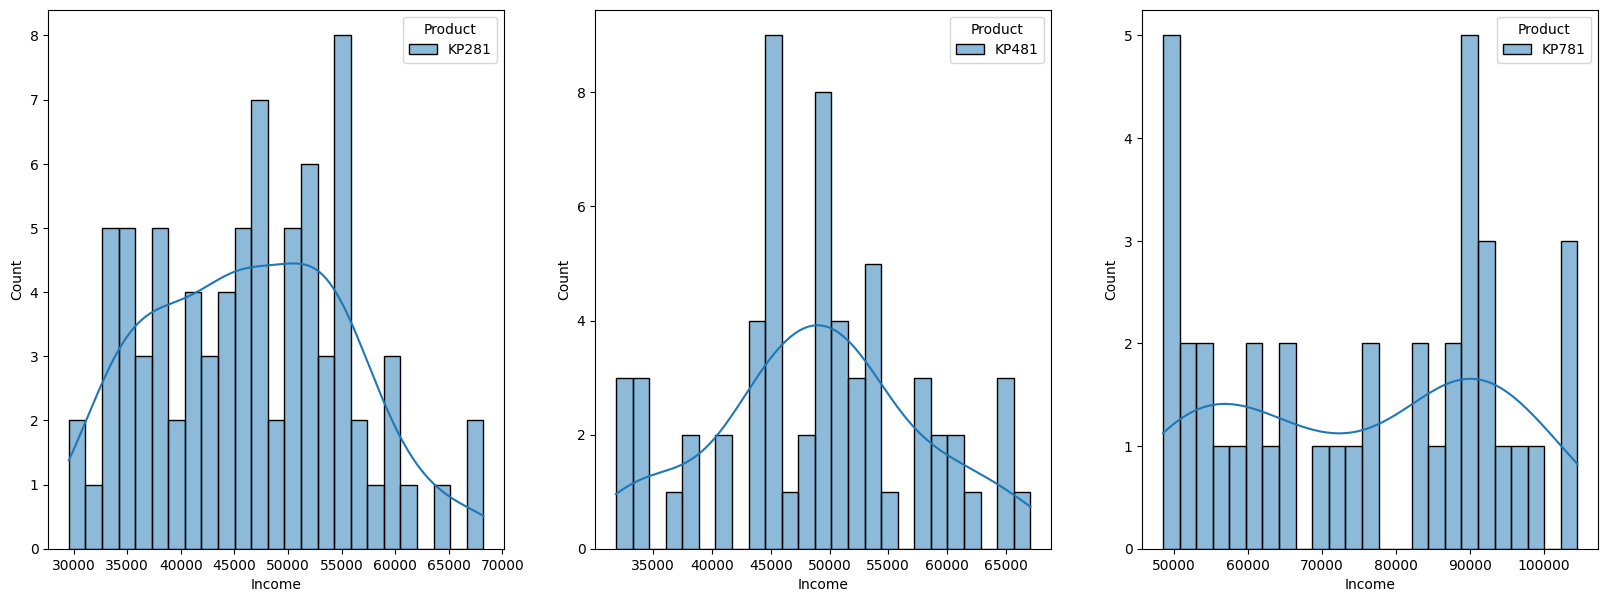

In [44]:
# Income vs all product analysis:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.histplot(data = kp281_df, x = 'Income',hue = 'Product',kde = True,bins =25,color='yellow')

plt.subplot(1,3,2)
sns.histplot(data = kp481_df, x = 'Income',hue = 'Product',kde = True,bins =25,color='green')

plt.subplot(1,3,3)
sns.histplot(data = kp781_df, x = 'Income',hue = 'Product',kde = True,bins =25,color='blue')

plt.show()

COUNCLUSION:
* KP281 & KP481 products are bought by 30k to 70k $ earning customers.
* KP781 product bought by customers who earning more than 50k.

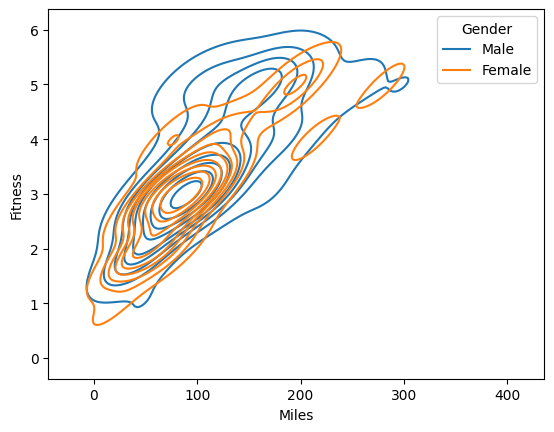

In [45]:
sns.kdeplot(data = df, y ='Fitness',x = 'Miles', hue = 'Gender');

Observation:

Most of the customer who Runs for miles greater than 100 are having better shape i.e. grater than 3 rating.

**MULTIVARIATE ANALYSIS**

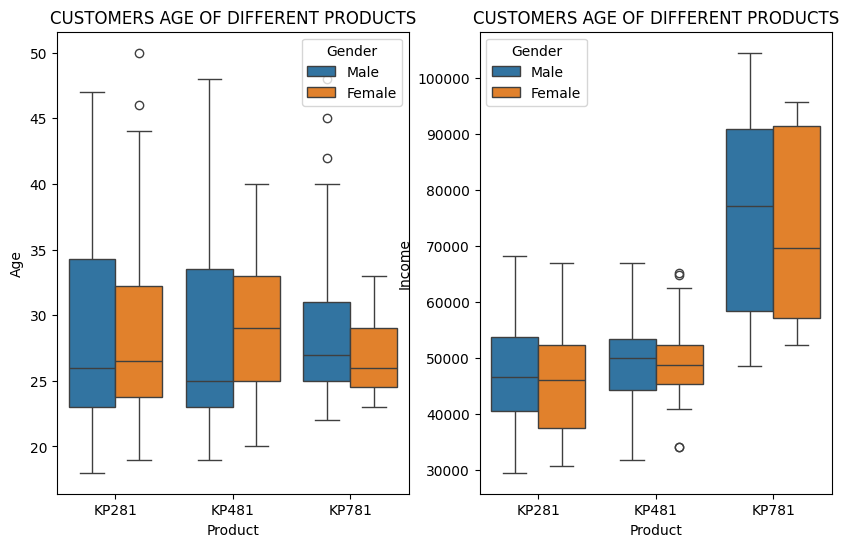

In [46]:
# age vs product analysis
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data =df,y = 'Age',x ='Product',hue = 'Gender').set_title('CUSTOMERS AGE OF DIFFERENT PRODUCTS')
# income vs prouct analysis
plt.subplot(1,2,2)
sns.boxplot(data =df,y = 'Income',x ='Product',hue = 'Gender').set_title('CUSTOMERS AGE OF DIFFERENT PRODUCTS')
plt.show()

CONCLUSION:

* The KP281 IQR is high incomparison to other products so the meadian age for product kp281 is approx 26.
* The meadian age for the KP781 prodcut is very high in comparison to others.
* More earning cusotmers prefer KP781 product and less than the meadian income for the other products.
* KP281 product is used by the male who is in there 20's. and also for the iccome



Text(0.5, 1.0, 'PRODUCT VS EDUCATION ANALYSIS')

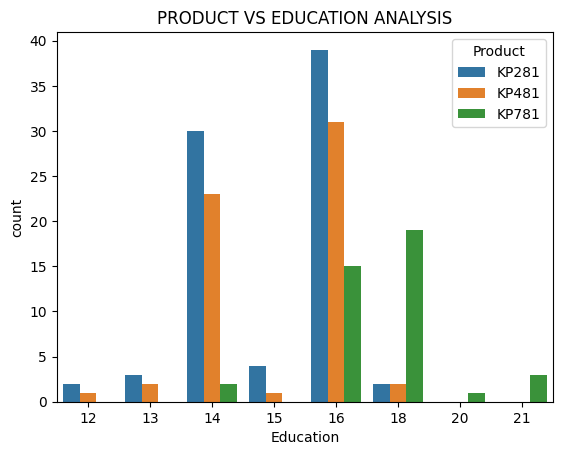

In [47]:
# education vs product analysis
sns.countplot(data =df,hue ='Product',x = 'Education').set_title('PRODUCT VS EDUCATION ANALYSIS')

CONCLUSION:

*  More than the 16 educated customers prefer KP281 product.
*  More than 18 educated customers prefers product KP781.


# BASIC PROBABILITY ANALYSIS:
(Marginal and Conditional probability)

Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

ANALYIS ON THE BELOW RELATION TABELS:

*   PRODUCT VS GENDER
*   PRODUCT VS MARITALSTATUS
*   PRODUCT VS SELF RATE
*   PRODUCT VS Income_category
*   PRODUCT VS Age_category





In [48]:
# create a DEEP copy of df
new_df = df.copy()
new_df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [49]:
# new columns for ages
bins = [14,20,30,40,60]
labels = ['TEENS','IN-20s','IN-30s','ABOVE 40s']
new_df['Age_group'] = pd.cut(new_df['Age'],bins)
new_df['Age_category'] = pd.cut(new_df['Age'],bins,labels = labels)

In [50]:
# new clumns for the incomes
bins = [29000,35000,60000,85000,105000]
labels = ['LOW INCOME','LOW-MID INCOME','UPPER-MID INCOME','HIGH INCOME']
new_df['Inome_group'] = pd.cut(new_df['Income'],bins)
new_df['Income_category'] = pd.cut(new_df['Income'],bins,labels = labels)

In [51]:
new_df['Self_rate'] = new_df['Fitness'].replace({1:'POOR',2:'FAIR',3:'GOOD',4:'VERY GOOD',5:'EXCELLENT'})

In [52]:
new_df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Age_category,Inome_group,Income_category,Self_rate
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",TEENS,"(29000, 35000]",LOW INCOME,VERY GOOD
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",TEENS,"(29000, 35000]",LOW INCOME,GOOD


**PRODUCT VS GENDER**

In [53]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Gender'],margins = True,normalize = True)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


CONCLUSION Marginal Probability:

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

* Marginal Probability of any customer buying
product KP281 is : 44.44 % (cheapest / entry level product)

* Product KP481 is : 33.33 % ( for intermediate users)

* Product KP781 is : 22.22 % ( product for extensive use who run/walk more miles)


In [54]:
#conditional probability
# Probability of male customer buying the product given that it is 'KP281'
#p(male|KP281) = P(male inter kp781)/ p(kp281)
(pd.crosstab([new_df["Product"]],new_df["Gender"],margins=True,normalize="columns"))*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


Female Analysis:
-----
* Probability of Selling Product
KP281 | Female = 52 %

* Probability of Selling ProductKP481 | Female = 38 %

* Probability of Selling ProductKP781 | Female = 10 %
------------

Male anaysis:

* Probability of Selling ProductKP281 | male = 38 %

* Probability of Selling ProductKP481 | male = 30 %

* Probability of Selling ProductKP781 | male = 32 %*

* Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

* Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

**PRODUCT VS MARITAL STATUS**

In [55]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['MaritalStatus'],normalize= True) *100,2)

MaritalStatus,Partnered,Single
Product,,
KP281,26.67,17.78
KP481,20.00,13.33
KP781,12.78,9.44


Marginal Probability for

* Married Customers : 59.44 %
* Single Customers : 40.555 %

CONCLUSION:

*   Most of the products used by the cusotmers who all partnerd i.e. 59,44 %.
*   KP281 had the highest in demand in comparison to other products used by the partnered couple aroun 28,67%.
*   And the sigle status customers also  use product KP281 (17.78%).



In [56]:
np.round(pd.crosstab([new_df["Product"]],new_df["MaritalStatus"],margins=True,normalize="columns")*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22


KP281 | Partnered = 44.85 %

KP481 | Partnered = 33.64 %

KP781 | Partnered = 21.49 %

KP281 | Single = 43.83 %

KP481 | Single = 32.87 %

KP781 | Single = 23.28 %

* Probability of Married Person purchasing any product is 59.44 %

* Probability of Single Person purchasing any product is 40.55 %

* Probability of a Married person buying product KP281 and KP481 is slightly higher than the customers who are single.

* Probability of a single person buying KP781 is higher than Married customers.

* So , KP781 is also recommended for people who are single and exercises more.

**PRODUCT VS SELF RATING**

In [57]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Self_rate'],margins = True,normalize = True)*100,2)

Self_rate,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD,All
Product,,,,,,
KP281,1.11,7.78,30.00,0.56,5.00,44.44
KP481,0.00,6.67,21.67,0.56,4.44,33.33
KP781,16.11,0.00,2.22,0.00,3.89,22.22
All,17.22,14.44,53.89,1.11,13.33,100.00


CONCLUSION:

*   Most of the products used by the cusotmers who all gave the rating as GOOD  i.e. 53.89 %
*   KP281 had the highest rating amoungst the other products which is of 30% followed by the KP481 having 21.67 % rating

In [58]:
# # Marginal probability
#Rating given by cutomer is excellent on the treadmill and also for the poor rating given by customer
probability_rating_excelent = round((31 / 180),2)
probability_rating_excelent = round(probability_rating_excelent* 100, 2)
probability_rating_poor = round((2 / 180),2)
probability_rating_poor = round(probability_rating_poor* 100, 2)
print(f'PROBABILITY OF EXCELLENT RATING GIVEN BY CUSTOMERS IS: {probability_rating_excelent} %')
print(f'PROBABILITY OF POOR RATING GIVEN BY CUSTOMERS IS: {probability_rating_poor} %')

PROBABILITY OF EXCELLENT RATING GIVEN BY CUSTOMERS IS: 17.0 %
PROBABILITY OF POOR RATING GIVEN BY CUSTOMERS IS: 1.0 %


In [59]:
#conditional probability
# Probability of rating given by customer is excelent buying the product given that it is 'KP781'

prb_excelent_rating = round((29/40),2)
excelent_rating_percentage = round((prb_excelent_rating*100),2)
print(f'PROBABILITY EXCELENT RATING GIVEN BY CUSTOMER ON THE PROUCT KP781 IS: {excelent_rating_percentage}%')

PROBABILITY EXCELENT RATING GIVEN BY CUSTOMER ON THE PROUCT KP781 IS: 72.0%


**PRODUCT VS AGE CATEGORY**

In [60]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Age_category'],margins = True,normalize = True)*100,2)

Age_category,TEENS,IN-20s,IN-30s,ABOVE 40s,All
Product,,,,,
KP281,3.33,27.22,10.56,3.33,44.44
KP481,2.22,17.22,12.78,1.11,33.33
KP781,0.00,16.67,3.33,2.22,22.22
All,5.56,61.11,26.67,6.67,100.00


CONCLUSION:

*   Most of the products used by the cusotmers who all in their 20s i.e. 61.11 %
*   KP281  had the highest in demand in comparison to other products.




In [61]:
# # Marginal probability
# what percent of people in thier 30s uses the treadmill
probability_20s_age = round((110/ 180),2)
probability_20s_age = round(probability_20s_age* 100, 2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 20s USES THE TREADMILL IS: {probability_20s_age}')
# what percent of people in their 30s uses the treadmill
probability_30s_age = round((48/ 180),2)
probability_30s_age = round(probability_30s_age* 100, 2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 30s USES THE TREADMILL IS: {probability_30s_age}')
# what percent of people in their 30s uses the treadmill
probability_above40s_age = round((12/ 180),2)
probability_above40s_age = round(probability_above40s_age* 100, 2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ARE ALL ABOVE - 40s USES THE TREADMILL IS: {probability_above40s_age}')


PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 20s USES THE TREADMILL IS: 61.0
PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 30s USES THE TREADMILL IS: 27.0
PROBABILITY OF THE CUSTOMERS WHO ARE ALL ABOVE - 40s USES THE TREADMILL IS: 7.0


In [62]:
#conditional probability
# Probability of cusotmers who are in their 20s uses the product 'KP281'

prb_cust = round((49/80),2)
percentage_cust = round((prb_cust*100),2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 20S USES THE PROUCT KP281 IS: {percentage_cust}%')

# Probability of cusotmers who are in their 30s uses the product 'KP481'

prb_cust = round((23/60),2)
percentage_cust = round((prb_cust*100),2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 30S USES THE PROUCT KP481 IS: {percentage_cust}%')

PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 20S USES THE PROUCT KP281 IS: 61.0%
PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 30S USES THE PROUCT KP481 IS: 38.0%


**PRODUCT VS INCOME CATEGORY**

In [63]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Income_category'],margins = True,normalize = True)*100,2)

Income_category,LOW INCOME,LOW-MID INCOME,UPPER-MID INCOME,HIGH INCOME,All
Product,,,,,
KP281,4.44,36.67,3.33,0.00,44.44
KP481,3.33,26.11,3.89,0.00,33.33
KP781,0.00,6.11,6.67,9.44,22.22
All,7.78,68.89,13.89,9.44,100.00


CONCLUSION:

Most of the products purchased by the customers who are having salary in low to mid income category i.e. 68.89%

In [64]:
#marginal probability
# In which income ranges the amount of treadmill purchased is high
# for the low income people
income_prob = round((14/180),2)
income_pct = income_prob* 100
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER LOW CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

income_prob = round((124/180),2)
income_pct = round((income_prob*100),2)
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER LOW - MID CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

income_prob = round((25/180),2)
income_pct = round((income_prob* 100),2)
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER UPPER - MID CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

income_prob = round((17/180),2)
income_pct = income_prob* 100
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER HIGH CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

THE CUSTOMERS WHOSE INCOME FALL UNDER LOW CATEGORY HAVE PURCHASED APPROX: 8.0 %
THE CUSTOMERS WHOSE INCOME FALL UNDER LOW - MID CATEGORY HAVE PURCHASED APPROX: 69.0 %
THE CUSTOMERS WHOSE INCOME FALL UNDER UPPER - MID CATEGORY HAVE PURCHASED APPROX: 14.0 %
THE CUSTOMERS WHOSE INCOME FALL UNDER HIGH CATEGORY HAVE PURCHASED APPROX: 9.0 %


In [65]:
# conditional probability
# what is the probability of the customers whose salary range lies in the low - mid income given that he had purchased kp281 product?
prb_kp281_cust = round((66/124),2)
kp281_pct = prb_kp281_cust* 100
print(f'{kp281_pct} % CUSTOMERS HAD PURCHASED PRODUCT KP281 WHOSE INCOME RANGES IN LOW - MID CATEGORY i.e. AVERAGE CUSTOMERS')

53.0 % CUSTOMERS HAD PURCHASED PRODUCT KP281 WHOSE INCOME RANGES IN LOW - MID CATEGORY i.e. AVERAGE CUSTOMERS


# PROBABILITY ANALYSIS

In [66]:
n_df =df[['Product','Gender','MaritalStatus']].melt()
round(n_df.groupby(['variable','value'])['value'].count()/len(df)*100,2)

variable       value    
Gender         Female       42.22
               Male         57.78
MaritalStatus  Partnered    59.44
               Single       40.56
Product        KP281        44.44
               KP481        33.33
               KP781        22.22
Name: value, dtype: float64

ANALYSIS ON MALE WHO ARE SINGLE

In [67]:
df_ms = df[(df['Gender'] ==  'Male') & (df['MaritalStatus'] == 'Single')]
df_ms.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141


In [68]:
prob1 = round(len(df_ms[df_ms['Product'] == 'KP281'])/ len(df_ms) * 100,2)
prob2 = round(len(df_ms[df_ms['Product'] == 'KP481'])/ len(df_ms) * 100,2)
prob3 = round(len(df_ms[df_ms['Product'] == 'KP781'])/ len(df_ms) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP281 IS: 44.19%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP481 IS: 23.26%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP781 IS: 32.56%


ANALYSIS ON MALE WHO ARE PARTNERED

In [69]:
df_mP = df[(df['Gender'] ==  'Male') & (df['MaritalStatus'] == 'Partnered')]
df_mP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,KP281,20,Male,13,Partnered,4,2,35247,47
14,KP281,23,Male,16,Partnered,3,1,38658,47
15,KP281,23,Male,16,Partnered,3,3,40932,75
17,KP281,23,Male,16,Partnered,4,3,39795,94
25,KP281,24,Male,13,Partnered,3,2,42069,47


In [70]:
prob1 = round(len(df_mP[df_mP['Product'] == 'KP281'])/ len(df_mP) * 100,2)
prob2 = round(len(df_mP[df_mP['Product'] == 'KP481'])/ len(df_mP) * 100,2)
prob3 = round(len(df_mP[df_mP['Product'] == 'KP781'])/ len(df_mP) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP281 IS: 34.43%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP481 IS: 34.43%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP781 IS: 31.15%


ANALYSIS ON FEMALE WHO ARE SINGLE

In [71]:
df_fs = df[(df['Gender'] ==  'Female') & (df['MaritalStatus'] == 'Single')]
df_fs.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
12,KP281,22,Female,16,Single,4,3,36384,75
13,KP281,22,Female,14,Single,3,3,35247,75
16,KP281,23,Female,14,Single,2,3,34110,103
18,KP281,23,Female,16,Single,4,3,38658,113
22,KP281,24,Female,16,Single,4,3,42069,94


In [72]:
prob1 = round(len(df_fs[df_fs['Product'] == 'KP281'])/ len(df_fs) * 100,2)
prob2 = round(len(df_fs[df_fs['Product'] == 'KP481'])/ len(df_fs) * 100,2)
prob3 = round(len(df_fs[df_fs['Product'] == 'KP781'])/ len(df_fs) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP281 IS: 43.33%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP481 IS: 46.67%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP781 IS: 10.0%


ANALYSIS ON FEMALE WHO ARE PARTNERED

In [73]:
df_fp = df[(df['Gender'] ==  'Female') & (df['MaritalStatus'] == 'Partnered')]
df_fp.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66


In [74]:
prob1 = round(len(df_fp[df_fp['Product'] == 'KP281'])/ len(df_fp) * 100,2)
prob2 = round(len(df_fp[df_fp['Product'] == 'KP481'])/ len(df_fp) * 100,2)
prob3 = round(len(df_fp[df_fp['Product'] == 'KP781'])/ len(df_fp) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP281 IS: 58.7%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP481 IS: 32.61%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP781 IS: 8.7%


CONCLUSIONS:

1. Probability of customer Buying the product KP281 has increased from 44.44% to 58.7%, if customer is Female and Partnered form the singles wwho are male.
2. Probability of customer Buying the prouct KP481 has increased from 33.33% to 46.7%, if customer is Female and Single.
3. Probability of the customers Buying the prouct KP781 increased from 22.22% to 32.56%, if customer is Male and Single.
4. Probability of Buying the prouct KP781 decreased from 31.15% to 8.7%, if customer is Female and Partnered.




# **HEATMAP AND PAIRPLOT**

Check correlation among different factors using heat maps or pair plots.

**HEATMAP**

In [75]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),linewidth = 2,cmap = 'Greens',annot = True)
plt.xticks(rotation = 90)
plt.title('CORRELATIONS')
plt.show()

ValueError: could not convert string to float: 'KP281'

<Figure size 1000x500 with 0 Axes>

CONCLUSION:
* Miles and usage and Miles and Fitness are highly correlated ,which conclude that if the customer usage is high their fitness level is also very high and miles he/ she more run/walk per week increases simultaneoulsy.
* Income and Education also shows a strong correlation which means that highly educated customer which all are having high salary prefer the KP281 product.
* And there is no such relation or string correlation between other fields.

**PAIRPLOT**

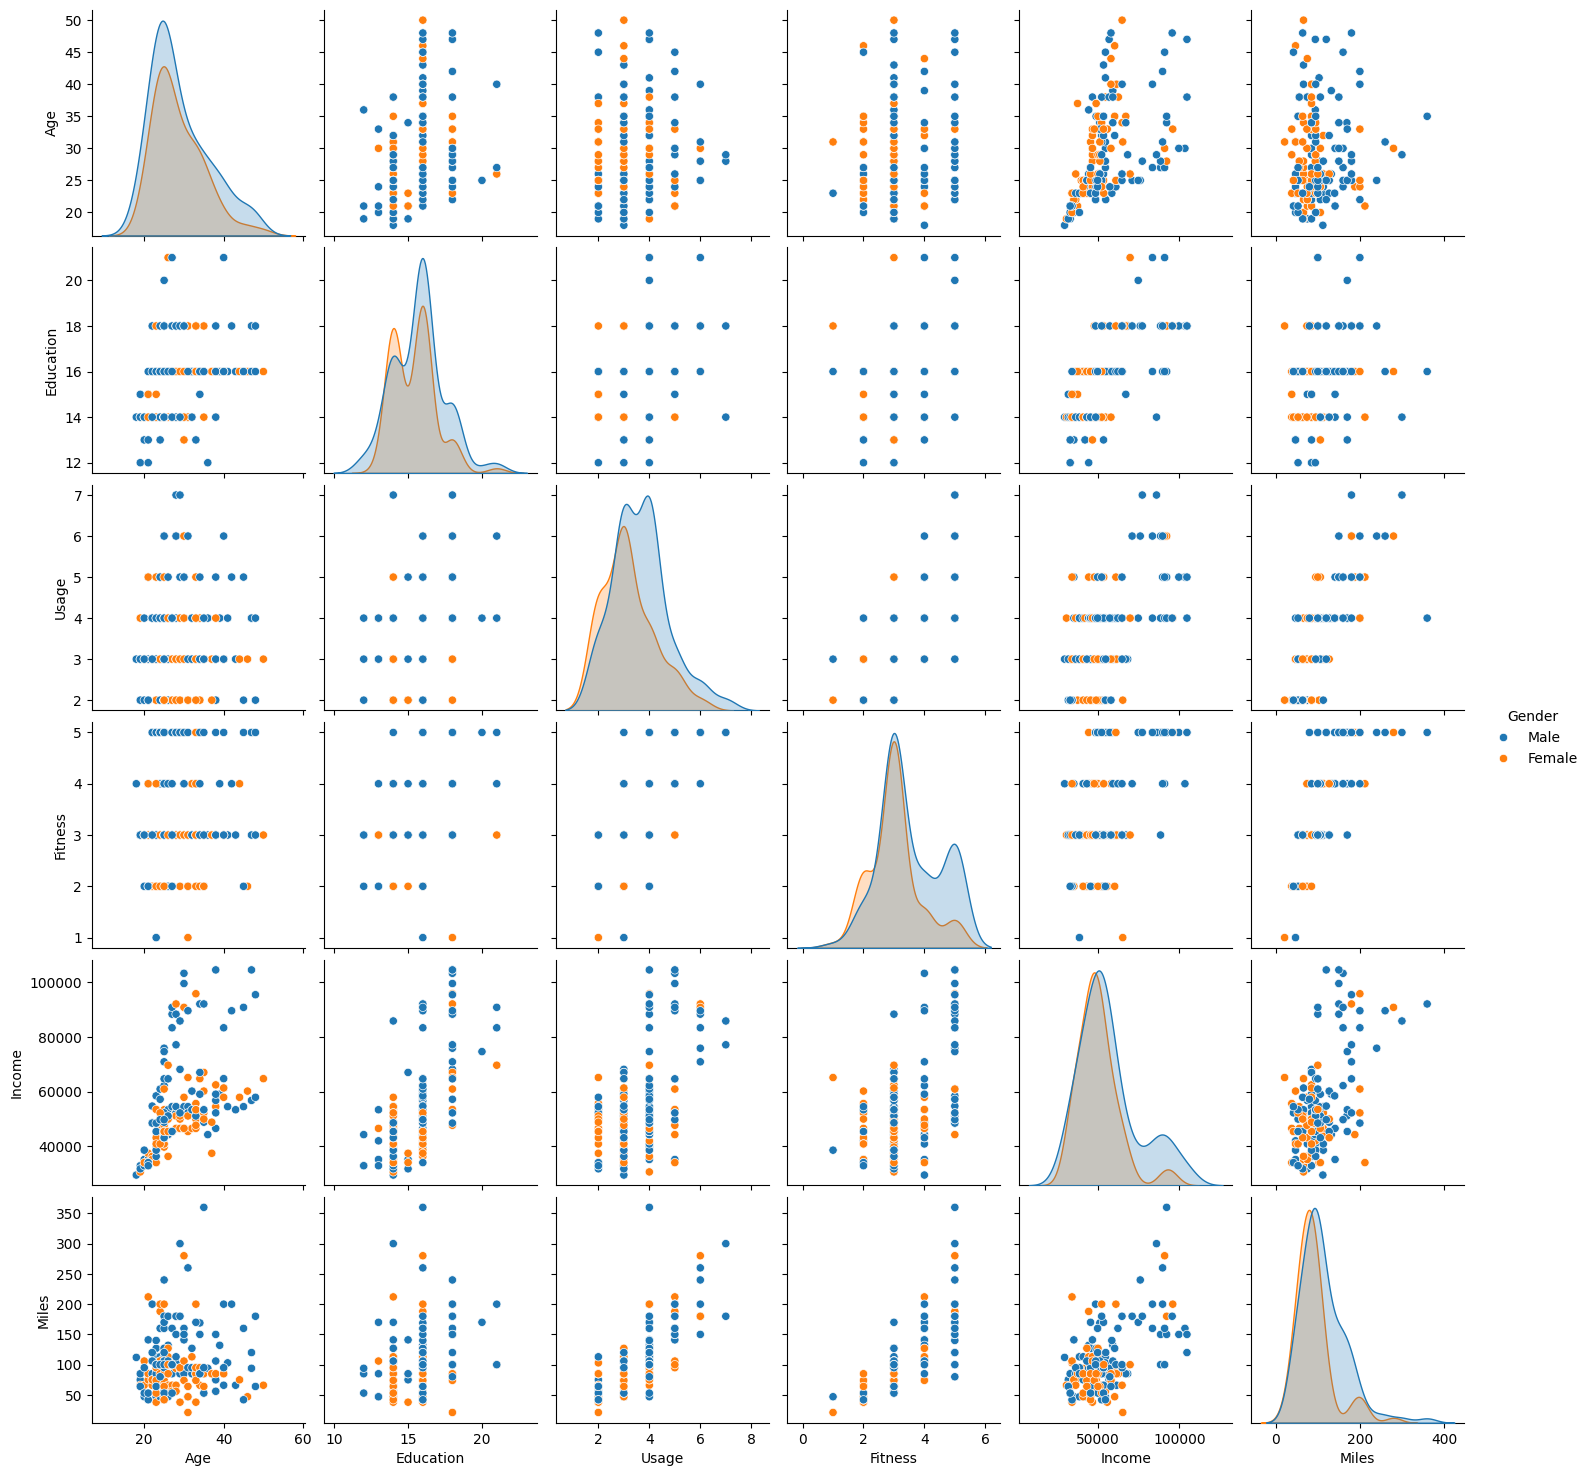

In [76]:
sns.pairplot(df,hue = 'Gender')

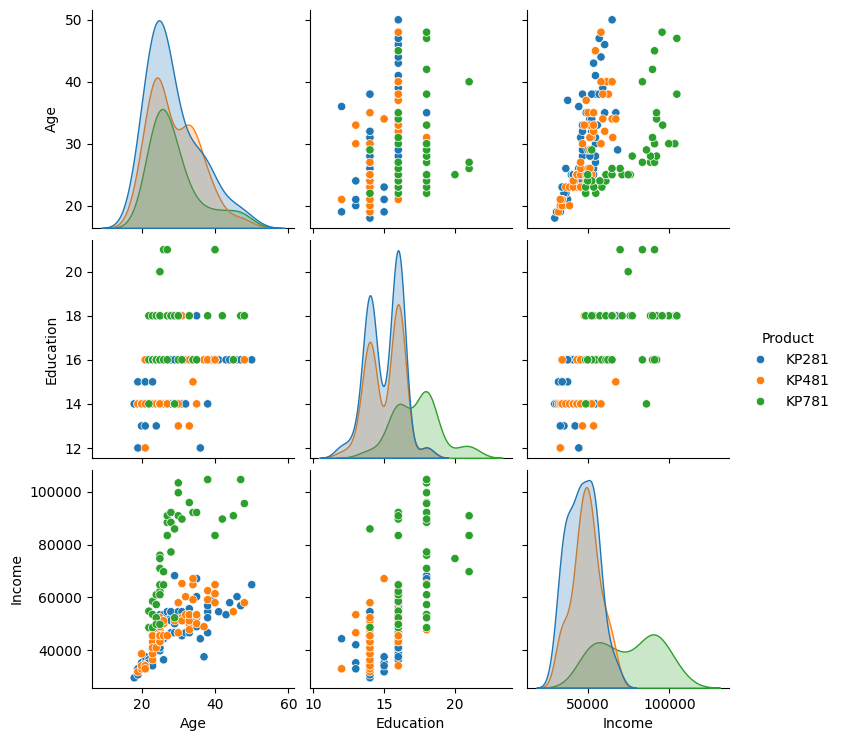

In [77]:
sns.pairplot(data=df[['Product','Age','Education','Income','Gender']], hue='Product')

CONCLUSION:

* If usage is more than 150 miles per km, mostly preferred KP781.
* Fitness level greater than 3 and usage more than 4days per week, are prefers KP781.
* High salaried customers prefer KP781.
* Customer having income around 50000, runs/walks around 50 to 150 miles each week.
* There is a positive correlation between age and income.
* Customer haivng age from 20 to 35, runs/walks around 130 miles each week.

# CUSTOMERS PROFILE:

### ***CUSTOMER PROFILE FOR THE PRODUCT KP281:***

*  KP281 procduct has more chances of buying then the other products.
*  Customer who are male and single prefer this product
*  Customer who  are female and partnered also prefer this prouct more.
*  Mostly preferd by the partnered cusotmers.
* Fitness level of cutomer mostly fall under 3.
* salary for this customers falls under the low - medium category.
* Education : less than 16
* Miles : Under 90
* usage is less than 4 days per week.

Marital Status : Both, but targeted more towards Partnered (60% Probability).

Gender: Both(Targeted)


### ***CUSTOMER PROFILE FOR THE PRODUCT KP481:***
* This is the second highest popular Product.
* Age: Around 28, but under 35
* Income : If Partnered then around 50000 else less than 50000
* Education : iees in less than 16(rating)
*  This product has almost similar customer's profile like KP281, but KP281  has wide range of customers than KP481 prouct .
* Male customers who partnered prefer more than Male customers who single.
* Income of customers falls under Less to medium earning category.
* Fitness level of cusotmers falls mostly under 3.
* It has almost similar customer's profile like KP281, but KP281 is wide range of customers than KP481.
* Usage under 4 days per week.

Marital Status : Both, but targeted more towards Partnered (60% Probability)

Gender: Both, but targeted more towards Male (51.7% Probability)

### ***CUSTOMER PROFILE FOR THE PRODUCT KP781:***

* This type of product mostly prefered by the High salary customers. And also upper - mid salary category.
* Age: Under 30
* Income : Above 60000
* Customers who educated more than 16 years.
* Mostly preferred by Male customers.
* Usage more than 120 miles per week.
* Fitness level cutomers are above 3.
* Usage more than 4 days per week.

Maritial Status : Both, but targeted more towards Partnered (57% Probability)


# BUSINESS INSIGHTS

* Most prefered prodcut or sold product is KP281 which are having approx 44.44% of total sales.
* Least sold product is KP781 22.2 %.
* Treadmill KP781 had unique among other treadmills when it comes to more usage or high fitness customers.
* KP281 is mostly prefered by the partnered customered.
* KP781 is less prefered by the single customers.
* For KP281 and KP481 product,education falls below 16 and for KP781 product education falls above 16.
* Usages of product KP281 is less than 4 and for product kP781 it is above 4.
* Most of the customer are male than females having 55.8 % total percentage tha 42.2% of females.
* Cusotmers who are partnered uses the treadmill most then the singles, which are having approx percentage of 59.4% and singles having percentage of approx 40.6%.
* Cusotomer profile for the product KP281 and KP481 are almost same.
* Male Partnered prefer KP481 & Female Partnered prefer KP281.
* Treadmill usage is approx 3 which is the average number of times customers plans to use the treadmill each week.
* For product KP281 and Kp481 75% of income data falls under 53000$.
* And for Product Kp781 75% of salry falls below 90000 $.
* PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP281 IS: 44.19%
* PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP281 AND KP481 IS: 34.43%
* PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP281 IS: 43.33%
* PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP281 IS: 58.7%

# RECOMMENDATION

* Provide advertisment for the products which are having low reach then the other products like KP481, KP781.
* As KP281 & KP481 products are preferred by almost similar Characteristics customers and KP281 is most sold product So, we can promote KP481 products more by showing them that it aslo have some advaced features which are also present in the KP281 product etc.
* Target the young gen cusotmers. As the Product kp281 and kp481 mostly used by the cutomers who all fall under 20's so we can attract these generation by providing more features on the treadmill like music functioon, motion sensor,body temperature sensor, sreen which shows the circuit and points for each mile etc. advancements are required.
* The KP781 product are preferred by Males, more usage and customer with high salay, we can promote this product with similar characteristics and also we can promote upcoming products to them.
* We can more promote these treadmils in the social media platforms and also the E-commerce sites to increase the reach of the products.
